In [1]:
import numpy as np
#from PySeismoSoil.class_ground_motion import Ground_Motion
import pandas as pd
import warnings
import matplotlib.pyplot as plt

In [2]:
def get_sine_displacement(amplitude: float,
                        ex_freq: float, 
                        cycles: float, 
                        sampling_freq: float) -> pd.DataFrame:
    r'''
    Calculate a sine shape time history of displacement.
    
    Args:
        amplitude (float): amplitude of the sine disp. -[meters]
        ex_freq (float): excitation frequency. -[Hz]
        cycles (float): number of cycles
        sampling freq (float): sampling frequency -[Hz]
    
    Returns:
        df_out (pd.DataFrame): dataframe with time history
        
    ::Note:
        `sampling_freq` needs to be at least 2 times of `ex_freq`
    
    '''
    duration = cycles/ex_freq
    num_of_data = int(sampling_freq*duration)
    time_arr = np.linspace(0, duration, num=num_of_data)
    disp_arr = amplitude * np.sin(time_arr*np.pi*2*ex_freq)
    print(f'sum of Disp = {np.sum(disp_arr)}')
    if sampling_freq<10*ex_freq:
        warnings.warn("Sampling freq is too low", UserWarning)
    df_out = {'Time': time_arr,
            'Disp': disp_arr}
    df_out = pd.DataFrame(df_out)
    
    #generate a plot
    df_out.plot(x='Time', y='Disp', title='Displacement')
    plt.xlabel('Time')
    plt.ylabel('Displacement, m')
    plt.show()
    return df_out

In [3]:
def get_sine_accel_g(amplitude_g: float,
                        ex_freq: float, 
                        cycles: float, 
                        sampling_freq: float) -> pd.DataFrame:
    r'''
    Calculate a sine shape time history of acceleration in g.
    
    Args:
        amplitude (float): amplitude of the sine accel. -[g]
        ex_freq (float): excitation frequency. -[Hz]
        cycles (float): number of cycles
        sampling freq (float): sampling frequency -[Hz]
    
    Returns:
        df_out (pd.DataFrame): dataframe with time history
        
    ::Note:
        `sampling_freq` needs to be at least 2 times of `ex_freq`
    
    '''
    duration = cycles/ex_freq
    num_of_data = int(sampling_freq*duration)
    time_arr = np.linspace(0, duration, num=num_of_data)
    #amplitude = -1.0*amplitude_g/(2*np.pi*ex_freq)**2
    accel_arr = -amplitude_g * np.sin(time_arr*np.pi*2*ex_freq)
    if sampling_freq<10*ex_freq:
        warnings.warn("Sampling freq is too low", UserWarning)
    df_out = {'Time': time_arr,
            'Accel': accel_arr}
    df_out = pd.DataFrame(df_out)
    
    #generate a plot
    df_out.plot(x='Time', y='Accel', title='Acceleration')
    plt.xlabel('Time')
    plt.ylabel('Accel, g')
    plt.show()
    return df_out

In [4]:
def get_accel_from_disp(df_displacement: pd.DataFrame):
    time_arr = df_displacement['Time'].values
    disp_arr = df_displacement['Disp'].values
    
    time_diff = np.diff(time_arr)
    
    disp_diff = np.diff(disp_arr)
    
    vel_arr = disp_diff / time_diff
    vel_diff = np.diff(vel_arr)
    accel_arr = vel_diff / time_diff[:-1] / 9.81
    print(f'PGA = {np.max(accel_arr)}')
    
    #Generate a plot
    df_acceleration = pd.DataFrame({'Time': time_arr[:-2], 'Accel': accel_arr})
    df_acceleration.plot(x='Time', y='Accel', title='Sine Displacement')
    plt.xlabel('Time')
    plt.ylabel('Accel, $g$')
    plt.show()
    return df_acceleration

## `0.9g` time histories

Processing 0.2 Hz


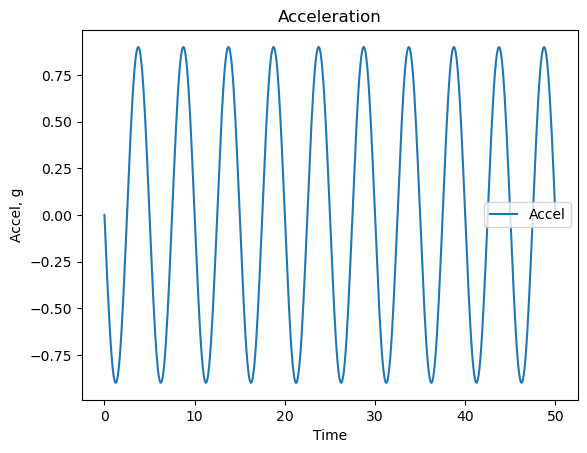

sum of Disp = 9.947598300641403e-14


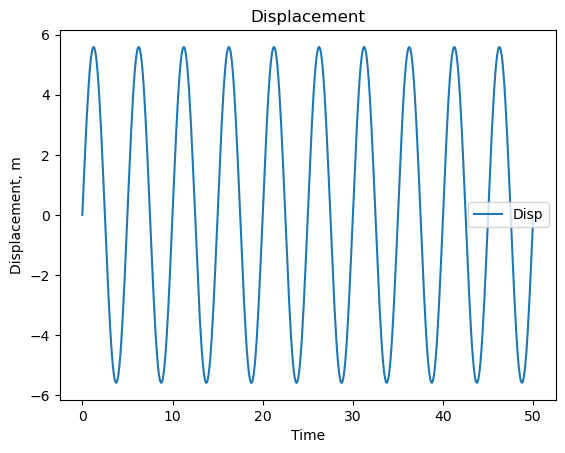

Processing 0.5 Hz


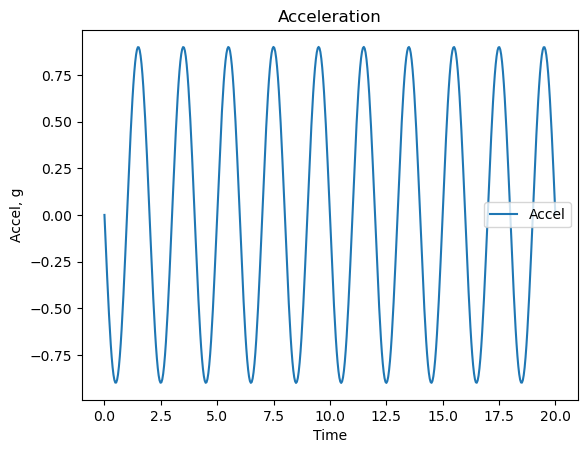

sum of Disp = -3.552713678800501e-14


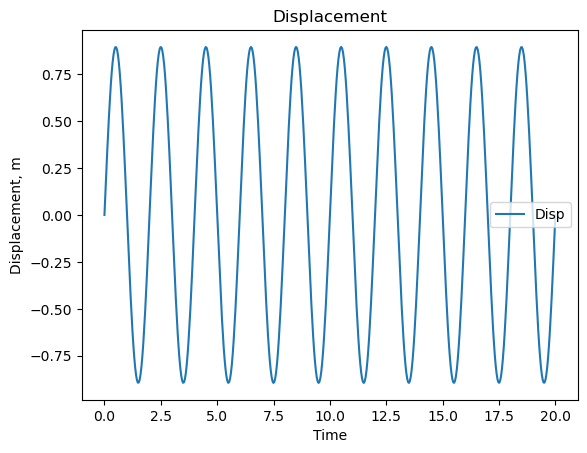

Processing 1.0 Hz


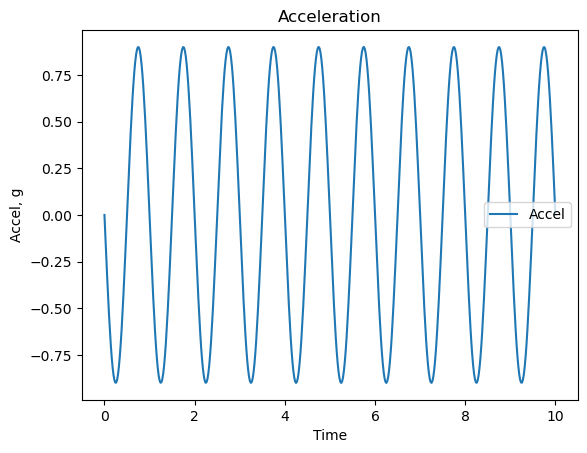

sum of Disp = -8.881784197001252e-15


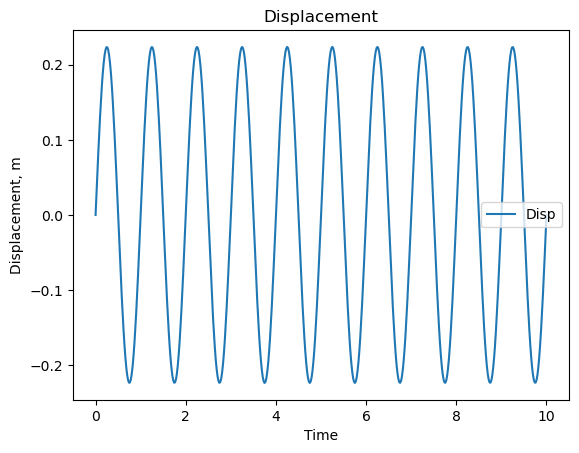

Processing 2.0 Hz


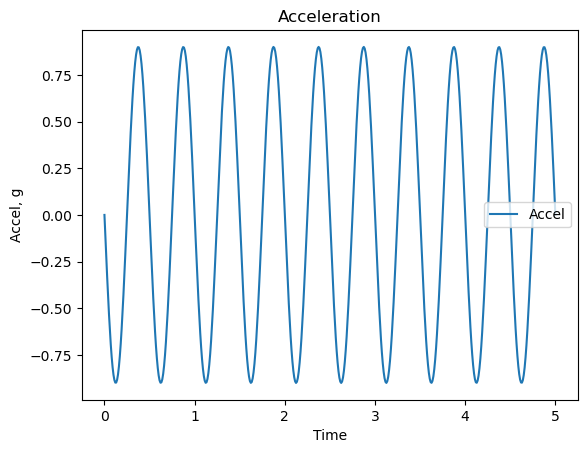

sum of Disp = -2.220446049250313e-15


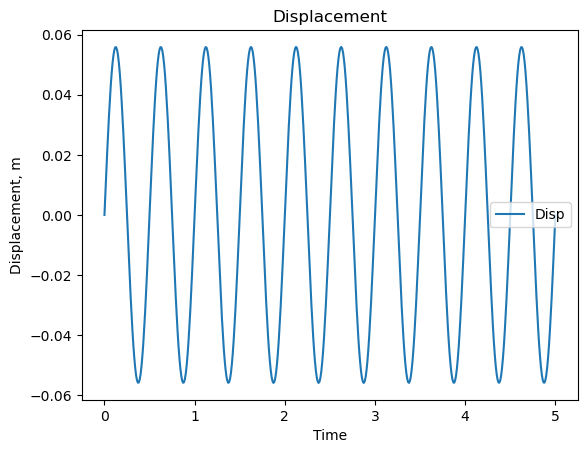

Processing 5.0 Hz


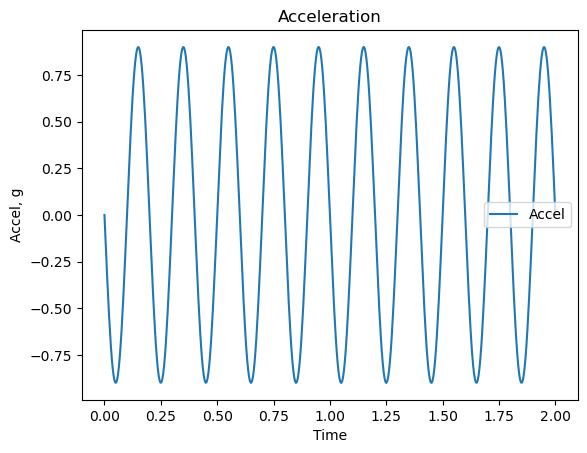

sum of Disp = -2.4980018054066022e-15


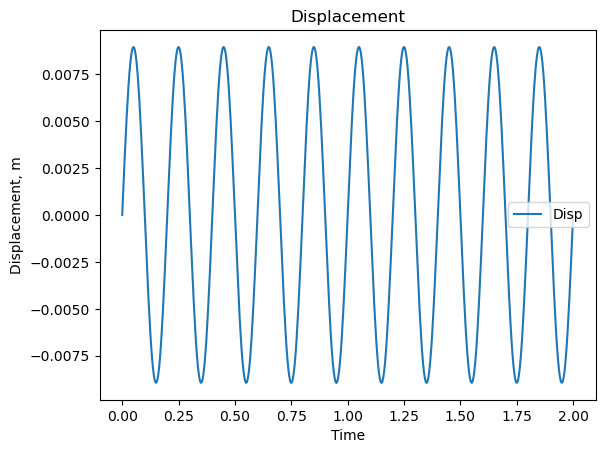

In [5]:
amplitude_g = 0.9
cycles = 10.0
freq_list = [0.2, 0.5, 1.0, 2.0, 5.0]
for ex_freq in freq_list:
    sampling_freq = ex_freq * 50.0
    print(f'Processing {ex_freq} Hz')
    df_out = get_sine_accel_g(amplitude_g, ex_freq, cycles, sampling_freq)
    amplitude = amplitude_g/(2*np.pi*ex_freq)**2*9.81
    df_out.to_csv(f'{ex_freq}_Hz_accel_0.9g.txt', index=False, sep='\t')
    get_sine_displacement(amplitude,ex_freq, cycles, sampling_freq)
    print('============================')